In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
import seaborn as sns

In [2]:
df = pd.read_csv("/content/Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
data = df[['Annual Income (k$)', 'Spending Score (1-100)']]

In [4]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

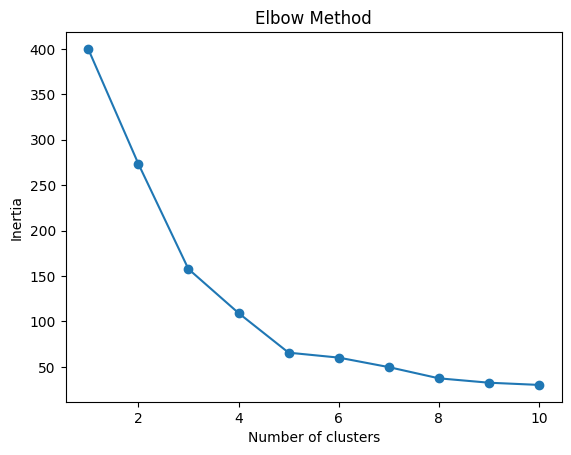

In [5]:
inertia = []
K_range = range(1, 11)
for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_data)
    inertia.append(kmeans.inertia_)

plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

In [6]:
kmeans = KMeans(n_clusters=5, random_state=42)
clusters = kmeans.fit_predict(scaled_data)
df['Cluster'] = clusters

In [7]:
df.groupby('Cluster')[['Annual Income (k$)', 'Spending Score (1-100)']].mean()

,Annual Income (k$),Spending Score (1-100)
Cluster,,
0,55.296296,49.518519
1,86.538462,82.128205
2,25.727273,79.363636
3,88.200000,17.114286
4,26.304348,20.913043


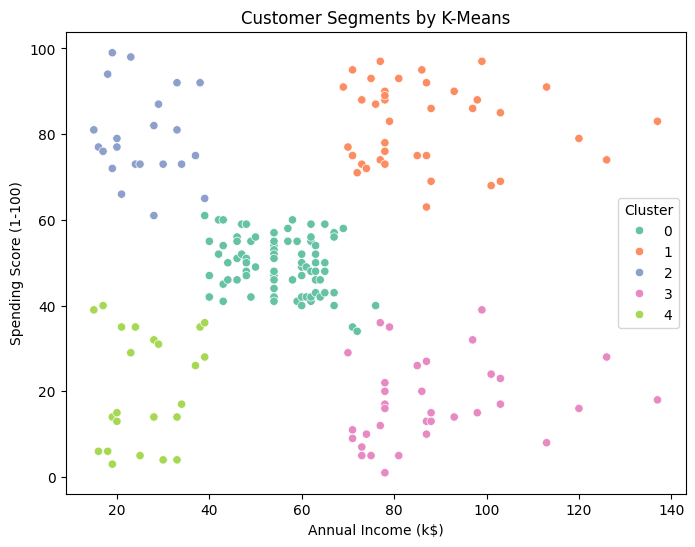

In [8]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', data=df, palette='Set2')
plt.title('Customer Segments by K-Means')
plt.show()

In [9]:
db = DBSCAN(eps=0.5, min_samples=5)
db_clusters = db.fit_predict(scaled_data)
df['DBSCAN_Cluster'] = db_clusters

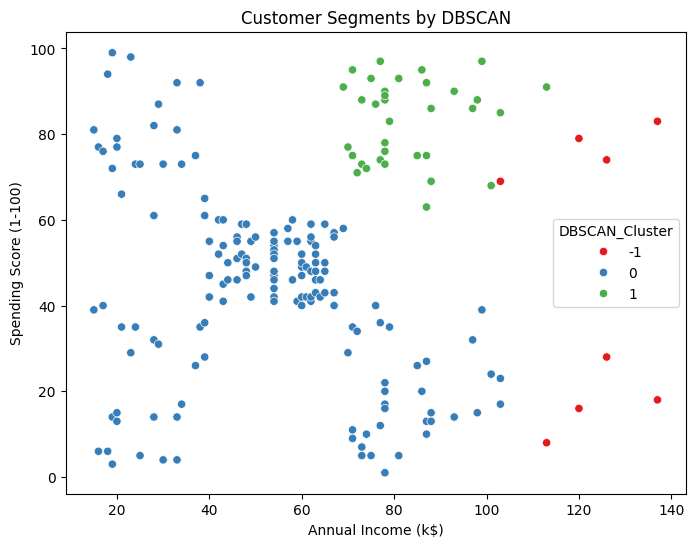

In [10]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)', hue='DBSCAN_Cluster', data=df, palette='Set1')
plt.title('Customer Segments by DBSCAN')
plt.show()